In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

T = 10
fs = 8000*16

ts = np.linspace(0, T, T*fs, endpoint=False)
# chirp = scipy.signal.chirp(ts, f0=2e6, t1=80, f1=20e6, method='linear')
# chirp = scipy.signal.chirp(ts, f0=200*2*8, t1=20, f1=1500*2*8, method='linear')
chirp = scipy.signal.chirp(ts, f0=2e6, t1=128*16, f1=20e6, method='linear')

f, t, Sxx = scipy.signal.spectrogram(chirp, fs=fs, window='nuttall',
                                     noverlap=256*8*2, nperseg=512*8*2,
                                     nfft=2048*16*8)

# plt.pcolormesh(t, f, Sxx)
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# # plt.pcolormesh(t, f, Sxx)
# plt.show()

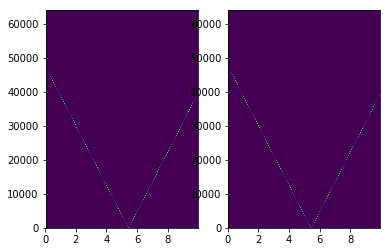

In [2]:
delayed = scipy.signal.chirp(ts, f0=2e6, t1=128*16,
                             f1=20e6, method='linear')
delayed = np.array([0] * 600 + list(delayed[600:]))

fd, td, Sxxd = scipy.signal.spectrogram(delayed, fs=fs, window='nuttall',
                                     noverlap=256*8*2, nperseg=512*8*2,
                                     nfft=2048*16*8)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pcolormesh(t, f, Sxx)
ax2.pcolormesh(td, fd, Sxxd)
plt.show()

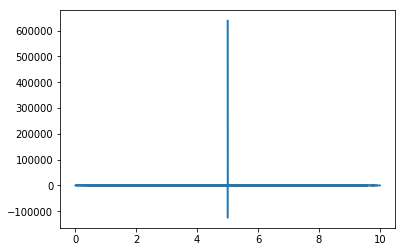

In [5]:
# chirp = scipy.signal.chirp(ts, f0=2e6, t1=128*16, f1=20e6, method='linear')
cor = scipy.signal.correlate(chirp, delayed)
# cor = scipy.signal.correlate(chirp, np.array([0] * 500 + list(delayed[500:])))
plt.plot(np.linspace(0, 10, len(cor)), cor)

In [ ]:
noise_f = np.random.normal(0,1,(2048, len(chirp)))
noise_t = np.fft.ifft(noise_f.T)
rx = chirp + noise_t
cor = scipy.signal.correlate(rx, delayed)
plt.plot(np.linspace(0, 10, len(cor)), cor)